In [39]:
%pip install Pillow==8.4

Note: you may need to restart the kernel to use updated packages.


In [40]:
import io
from PIL import Image
import requests
import io
import glob, os, sys, time, uuid

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

from io import BytesIO
from PIL import Image, ImageDraw

from video_indexer import VideoIndexer
from azure.cognitiveservices.vision.face import FaceClient
from azure.cognitiveservices.vision.face.models import TrainingStatusType
from msrest.authentication import CognitiveServicesCredentials

In [41]:
CONFIG = {
    'SUBSCRIPTION_KEY': '8dfc3281132a4e9aa4e4154e021b6adf',
    'LOCATION': 'trial',
    'ACCOUNT_ID': '8713715d-4101-42f8-b66d-b997c8ee2d10'
}

video_analysis = VideoIndexer(
    vi_subscription_key=CONFIG['SUBSCRIPTION_KEY'],
    vi_location=CONFIG['LOCATION'],
    vi_account_id=CONFIG['ACCOUNT_ID']
)

In [42]:
video_analysis.check_access_token()

Getting video indexer access token...
Access Token: eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJWZXJzaW9uIjoiMi4wLjAuMCIsIktleVZlcnNpb24iOiIzYTJkNjYyODkzOWM0ZjdiYjkzMWY4NjU4YjIwYzE4MCIsIkFjY291bnRJZCI6Ijg3MTM3MTVkLTQxMDEtNDJmOC1iNjZkLWI5OTdjOGVlMmQxMCIsIkFjY291bnRUeXBlIjoiVHJpYWwiLCJQZXJtaXNzaW9uIjoiQ29udHJpYnV0b3IiLCJFeHRlcm5hbFVzZXJJZCI6IjE6bGl2ZS5jb206MDAwMzQwMDFFODUxRDcyRiIsIlVzZXJUeXBlIjoiTWljcm9zb2Z0Q29ycEFhZCIsIklzc3VlckxvY2F0aW9uIjoiVHJpYWwiLCJuYmYiOjE2Nzk5NjI4NTIsImV4cCI6MTY3OTk2Njc1MiwiaXNzIjoiaHR0cHM6Ly9hcGkudmlkZW9pbmRleGVyLmFpLyIsImF1ZCI6Imh0dHBzOi8vYXBpLnZpZGVvaW5kZXhlci5haS8ifQ.JbCGurJAaSDlJT0A0SXbQfczgJqwmVls2eH0Nsd-Ttm9_CnyvvQjf5FzqfzcjttCdqM9_9-KozEDNYxHemSC9sKAVDrE24QtjeY3iKQdf6vDKvP9Zoqppopa2OxPoXnqGSTxC5dKsdeifXfPwU67bBH6VFQkCpSDwnjTsDKpW8Ck63y05lmE6jVZ90EghHNR8xTyKp-ZqOqcMJjNfYz5De7v5WCG2URYSgpHCzjAr-muSINDvOkg321ZbQLaErXN0MVzpQmy0RDLWEOaoaxLQx8O6BHBsxjFZoLkol2vJuoeazurRLQk3Vq2mi0tHpaVIKu2wR4xHUni3Tv0wpDXRQ


In [43]:
video_id = 'd1b571c9a3'

In [44]:
video_analysis.get_video_info(video_id)

Getting video info for: d1b571c9a3


{'partition': None,
 'description': None,
 'privacyMode': 'Private',
 'state': 'Processed',
 'accountId': '8713715d-4101-42f8-b66d-b997c8ee2d10',
 'id': 'd1b571c9a3',
 'name': 'myvideo',
 'userName': 'Trong Phan',
 'created': '2023-03-27T11:25:44.0764978+00:00',
 'isOwned': True,
 'isEditable': True,
 'isBase': True,
 'durationInSeconds': 20,
 'duration': '0:00:20.7',
 'summarizedInsights': {'name': 'myvideo',
  'id': 'd1b571c9a3',
  'privacyMode': 'Private',
  'duration': {'time': '0:00:20.7', 'seconds': 20.7},
  'thumbnailVideoId': 'd1b571c9a3',
  'thumbnailId': '033a83a8-e4b6-4b7e-a456-20655a95f300',
  'faces': [{'videoId': 'd1b571c9a3',
    'confidence': 0,
    'description': None,
    'title': None,
    'thumbnailId': 'e0b6ed81-910b-4e28-9e22-49b2fa6dd8da',
    'seenDuration': 20.7,
    'seenDurationRatio': 1,
    'id': 1000,
    'name': 'Unknown #1',
    'appearances': [{'startTime': '0:00:00',
      'endTime': '0:00:20.7',
      'startSeconds': 0,
      'endSeconds': 20.7}]}],
 

In [45]:
info = video_analysis.get_video_info(video_id, video_language='English')

Getting video info for: d1b571c9a3


In [46]:
if len(info['videos'][0]['insights']['faces'][0]['thumbnails']):
    print("We found {} faces in this video.".format(str(len(info['videos'][0]['insights']['faces'][0]['thumbnails']))))

We found 6 faces in this video.


In [47]:
info['videos'][0]['insights']['faces'][0]['thumbnails']

[{'id': 'fcecfa90-72d1-4aa4-bc74-a2d2dab49a4f',
  'fileName': 'FaceInstanceThumbnail_fcecfa90-72d1-4aa4-bc74-a2d2dab49a4f.jpg',
  'instances': [{'adjustedStart': '0:00:00',
    'adjustedEnd': '0:00:00.0333333',
    'start': '0:00:00',
    'end': '0:00:00.0333333'}]},
 {'id': 'e0b6ed81-910b-4e28-9e22-49b2fa6dd8da',
  'fileName': 'FaceInstanceThumbnail_e0b6ed81-910b-4e28-9e22-49b2fa6dd8da.jpg',
  'instances': [{'adjustedStart': '0:00:01.8666666',
    'adjustedEnd': '0:00:01.8999999',
    'start': '0:00:01.8666666',
    'end': '0:00:01.8999999'}]},
 {'id': '72633c92-0cf8-4880-827c-950c6931384b',
  'fileName': 'FaceInstanceThumbnail_72633c92-0cf8-4880-827c-950c6931384b.jpg',
  'instances': [{'adjustedStart': '0:00:05.1333333',
    'adjustedEnd': '0:00:05.1666666',
    'start': '0:00:05.1333333',
    'end': '0:00:05.1666666'}]},
 {'id': '0d40802d-d247-47d1-a97d-caa8ff7a7a78',
  'fileName': 'FaceInstanceThumbnail_0d40802d-d247-47d1-a97d-caa8ff7a7a78.jpg',
  'instances': [{'adjustedStart': '0

In [48]:
images = []
img_raw = []
img_strs = []
for each_thumb in info['videos'][0]['insights']['faces'][0]['thumbnails']:
    if 'fileName' in each_thumb and 'id' in each_thumb:
        file_name = each_thumb['fileName']
        thumb_id = each_thumb['id']
        img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumb_id)
        img_strs.append(img_code)
        img_stream = io.BytesIO(img_code)
        img_raw.append(img_stream)
        img = Image.open(img_stream)
        images.append(img)

Getting thumbnail from video: d1b571c9a3, thumbnail: fcecfa90-72d1-4aa4-bc74-a2d2dab49a4f
Getting thumbnail from video: d1b571c9a3, thumbnail: e0b6ed81-910b-4e28-9e22-49b2fa6dd8da
Getting thumbnail from video: d1b571c9a3, thumbnail: 72633c92-0cf8-4880-827c-950c6931384b
Getting thumbnail from video: d1b571c9a3, thumbnail: 0d40802d-d247-47d1-a97d-caa8ff7a7a78
Getting thumbnail from video: d1b571c9a3, thumbnail: 71f6e66d-8316-49a1-8286-46033fb932cc
Getting thumbnail from video: d1b571c9a3, thumbnail: 3c1c5820-d21e-4dd0-9954-a309b206d19d


Extract face thumbnails from the video

{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}
{'comment': b'Lavc59.18.100\x00'}


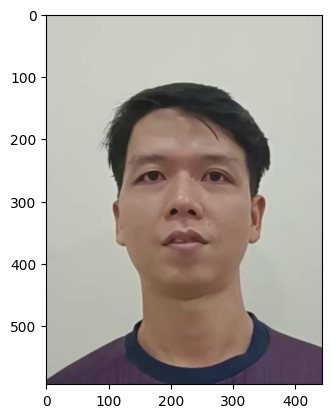

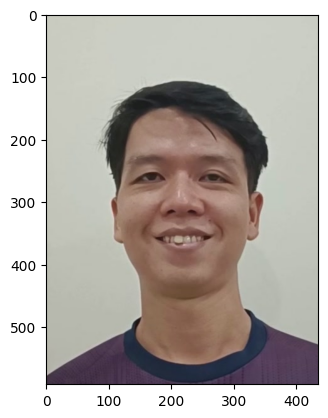

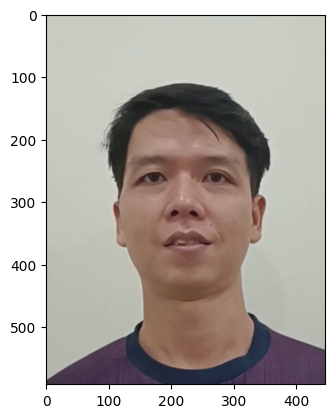

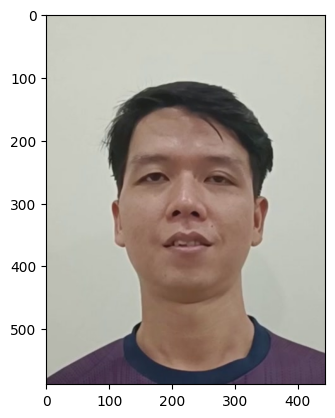

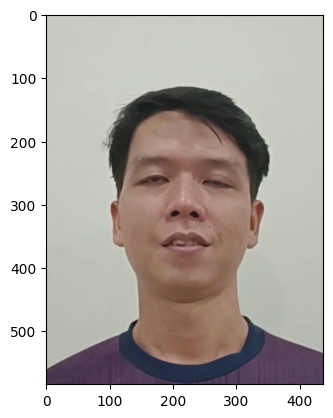

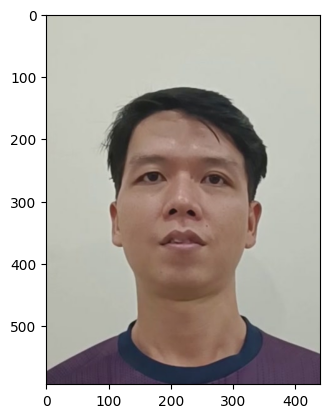

In [49]:
for img in images:
    print(img.info)
    plt.figure()
    plt.imshow(img)

In [50]:
i = 1
for img in images:
    print(type(img))
    img.save('video-analyzer-face' + str(i) + '.jpg')
    i= i+ 1

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [51]:
# !ls video-analyzer-face*.jpg
!dir video-analyzer-face*.jpg

 Volume in drive D is Data
 Volume Serial Number is DA2C-0BCF

 Directory of d:\self study\Udacity\AI Engineer using Microsoft Azure\project1-Automated-Passenger-Boarding-Kiosk\Step 3 - Face Data Extraction

03/28/2023  07:25 AM            15,225 video-analyzer-face1.jpg
03/28/2023  07:25 AM            17,274 video-analyzer-face2.jpg
03/28/2023  07:25 AM            16,309 video-analyzer-face3.jpg
03/28/2023  07:25 AM            16,931 video-analyzer-face4.jpg
03/28/2023  07:25 AM            16,359 video-analyzer-face5.jpg
03/28/2023  07:25 AM            16,418 video-analyzer-face6.jpg
               6 File(s)         98,516 bytes
               0 Dir(s)  130,196,660,224 bytes free


In [52]:
thumbnail_id='3c1c5820-d21e-4dd0-9954-a309b206d19d'

In [53]:
img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumbnail_id)
print(img_code)

Getting thumbnail from video: d1b571c9a3, thumbnail: 3c1c5820-d21e-4dd0-9954-a309b206d19d
b'\xff\xd8\xff\xfe\x00\x10Lavc59.18.100\x00\xff\xdb\x00C\x00\x08\x04\x04\x04\x04\x04\x05\x05\x05\x05\x05\x05\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x07\x07\x07\x08\x08\x08\x07\x07\x07\x06\x06\x07\x07\x08\x08\x08\x08\t\t\t\x08\x08\x08\x08\t\t\n\n\n\x0c\x0c\x0b\x0b\x0e\x0e\x0e\x11\x11\x14\xff\xc4\x00\xa7\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x04\x02\x05\x06\x07\x08\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x10\x00\x02\x01\x02\x04\x03\x06\x03\x04\x08\x04\x02\n\x02\x03\x01\x00\x01\x02\x03\x111!\x05\x04A\x06\x12aQ"q\x13\x81\x07\x912\xa1\xc1B\x14#\x82\x153rR\xb1\xd1b\xe1C\xf0\x92\xf1\xa2\x08\xc2\xb24$\x16c%SsUD5\x93\x17\x11\x01\x01\x00\x02\x01\x04\x01\x03\x02\x05\x05\x01\x01\x00\x00\x00\x00\x01\x02\x11\x031\x04\x12!A\x05"2QqaB#\x133\x81\x14\x15R\x91\xc1\xd1\xff\xc0\x00\x11\x08\x02R\x01\xb8\x03\x01"\x

Getting thumbnail from video: d1b571c9a3, thumbnail: 3c1c5820-d21e-4dd0-9954-a309b206d19d


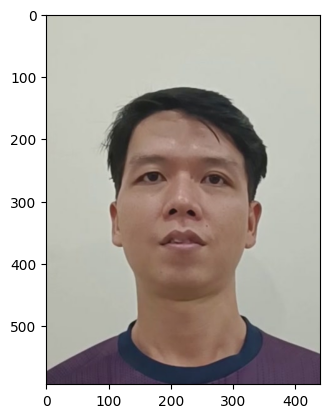

In [54]:
img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumbnail_id)
img_stream = io.BytesIO(img_code)
img = Image.open(img_stream)
imshow(img)

Create a Person model by combining various face frames

In [69]:
PERSON_GROUP_ID = str(uuid.uuid4())
person_group_name = 'person-trongphan'

In [70]:
PERSON_GROUP_ID

'185f5175-b3f3-4b4a-84aa-8e285303cf0c'

In [88]:
pip install --upgrade azure-cognitiveservices-vision-face

Note: you may need to restart the kernel to use updated packages.


In [58]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person, SnapshotObjectType, OperationStatusType  

In [71]:
def build_person_group(client, person_group_id, pgp_name):
    print('Create and build a person group...')
    # Create empty Person Group. Person Group ID must be lower case, alphanumeric, and/or with '-', '_'.
    print('Person group ID:', person_group_id)
    client.person_group.create(person_group_id = person_group_id, name=person_group_id)

    # Create a person group person.
    my_face = client.person_group_person.create(person_group_id, pgp_name)
    # Find all jpeg images of human in working directory.
    my_face_images = [file for file in glob.glob('*.jpg') if file.startswith("video-analyzer-face")]
    # Add images to a Person object
    for image_p in my_face_images:
        with open(image_p, 'rb') as w:
            client.person_group_person.add_face_from_stream(person_group_id, my_face.person_id, w)

    # Train the person group, after a Person object with many images were added to it.
    client.person_group.train(person_group_id)

    # Wait for training to finish.
    while (True):
        training_status = client.person_group.get_training_status(person_group_id)
        print("Training status: {}.".format(training_status.status))
        if (training_status.status is TrainingStatusType.succeeded):
            break
        elif (training_status.status is TrainingStatusType.failed):
            client.person_group.delete(person_group_id=PERSON_GROUP_ID)
            sys.exit('Training the person group has failed.')
        time.sleep(5)

In [84]:
TRONG_FACE_KEY = "6249d66b40524c969e552d15760f38c8"
TRONG_FACE_ENDPOINT = "https://trongfaceapiudacity.cognitiveservices.azure.com/"

In [85]:
face_client = FaceClient(TRONG_FACE_ENDPOINT, CognitiveServicesCredentials(TRONG_FACE_KEY))

In [86]:
face_client.api_version

'1.0'

In [87]:
build_person_group(face_client, PERSON_GROUP_ID, person_group_name)

Create and build a person group...
Person group ID: 185f5175-b3f3-4b4a-84aa-8e285303cf0c
Training status: succeeded.


In [91]:
def detect_faces(client, query_images_list):
    print('Detecting faces in query images list...')

    face_ids = {} # Keep track of the image ID and the related image in a dictionary
    for image_name in query_images_list:
        image = open(image_name, 'rb') # BufferedReader
        print("Opening image: ", image.name)
        time.sleep(5)

        # Detect the faces in the query images list one at a time, returns list[DetectedFace]
        faces = client.face.detect_with_stream(image)  

        # Add all detected face IDs to a list
        for face in faces:
            print('Face ID', face.face_id, 'found in image', os.path.splitext(image.name)[0]+'.jpg')
            # Add the ID to a dictionary with image name as a key.
            # This assumes there is only one face per image (since you can't have duplicate keys)
            face_ids[image.name] = face.face_id

    return face_ids

In [96]:
test_images = [file for file in glob.glob('video-analyzer-face*.jpg')]
# test_images = [file for file in glob.glob('video-analyzer-face1.jpg')]

In [97]:
test_images

['video-analyzer-face1.jpg',
 'video-analyzer-face2.jpg',
 'video-analyzer-face3.jpg',
 'video-analyzer-face4.jpg',
 'video-analyzer-face5.jpg',
 'video-analyzer-face6.jpg']

In [98]:
ids = detect_faces(face_client, test_images)

Detecting faces in query images list...
Opening image:  video-analyzer-face1.jpg
Face ID 610c47ff-3f50-4d3e-90f8-21e48f56159a found in image video-analyzer-face1.jpg
Opening image:  video-analyzer-face2.jpg
Face ID 3dc89bb9-effc-4664-8db2-fc28a68b003e found in image video-analyzer-face2.jpg
Opening image:  video-analyzer-face3.jpg
Face ID ca8a6da3-5e69-4797-b0c9-9fa424f6cb44 found in image video-analyzer-face3.jpg
Opening image:  video-analyzer-face4.jpg
Face ID f334ec63-1eed-4678-96cf-3c4908d2c9bb found in image video-analyzer-face4.jpg
Opening image:  video-analyzer-face5.jpg
Face ID 66ad63a0-77b9-402d-ba83-429f542d6741 found in image video-analyzer-face5.jpg
Opening image:  video-analyzer-face6.jpg
Face ID ba6074ca-261a-487c-8ea5-fb39f335eff5 found in image video-analyzer-face6.jpg


In [99]:
ids

{'video-analyzer-face1.jpg': '610c47ff-3f50-4d3e-90f8-21e48f56159a',
 'video-analyzer-face2.jpg': '3dc89bb9-effc-4664-8db2-fc28a68b003e',
 'video-analyzer-face3.jpg': 'ca8a6da3-5e69-4797-b0c9-9fa424f6cb44',
 'video-analyzer-face4.jpg': 'f334ec63-1eed-4678-96cf-3c4908d2c9bb',
 'video-analyzer-face5.jpg': '66ad63a0-77b9-402d-ba83-429f542d6741',
 'video-analyzer-face6.jpg': 'ba6074ca-261a-487c-8ea5-fb39f335eff5'}

Verify

In [100]:
verify_result = face_client.face.verify_face_to_face(ids['video-analyzer-face1.jpg'], ids['video-analyzer-face5.jpg'])

In [101]:
if verify_result.is_identical:
    print("Faces are of the same (Positive) person, similarity confidence: {}.".format(verify_result.confidence))
else:
    print("Faces are of different (Negative) persons, similarity confidence: {}.".format(verify_result.confidence))

Faces are of the same (Positive) person, similarity confidence: 0.92412.


In [102]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(10,5))
    plt.imshow(img)
    plt.show()

In [103]:
dl_source_url = 'https://raw.githubusercontent.com/trongvanphan/Automated-Passenger-Boarding-Kiosk/main/Project_Starter_Material_Preparation/ca-dl-trongphan.png'

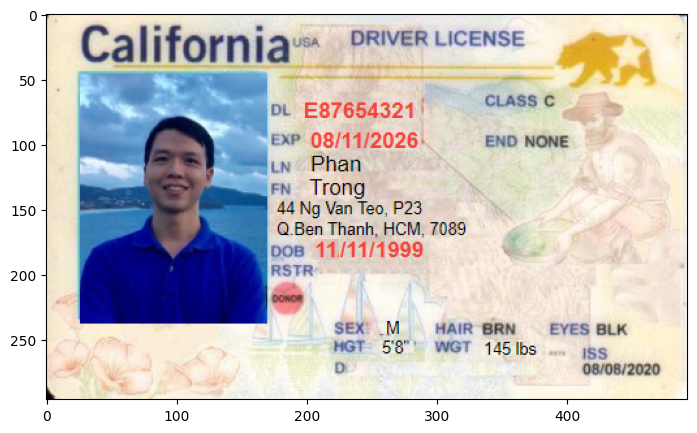

In [104]:
show_image_in_cell(dl_source_url)

In [105]:
dl_faces = face_client.face.detect_with_url(dl_source_url) 

In [106]:
for face in dl_faces:
    print('Face ID', face.face_id, 'found in image', dl_source_url)
    # Add the ID to a dictionary with image name as a key.
    # This assumes there is only one face per image (since you can't have duplicate keys)
    ids['ca-dl-sample.png'] = face.face_id

Face ID 8a27816b-bb28-4cd5-9e6c-ad299dc439a7 found in image https://raw.githubusercontent.com/trongvanphan/Automated-Passenger-Boarding-Kiosk/main/Project_Starter_Material_Preparation/ca-dl-trongphan.png


In [107]:
ids

{'video-analyzer-face1.jpg': '610c47ff-3f50-4d3e-90f8-21e48f56159a',
 'video-analyzer-face2.jpg': '3dc89bb9-effc-4664-8db2-fc28a68b003e',
 'video-analyzer-face3.jpg': 'ca8a6da3-5e69-4797-b0c9-9fa424f6cb44',
 'video-analyzer-face4.jpg': 'f334ec63-1eed-4678-96cf-3c4908d2c9bb',
 'video-analyzer-face5.jpg': '66ad63a0-77b9-402d-ba83-429f542d6741',
 'video-analyzer-face6.jpg': 'ba6074ca-261a-487c-8ea5-fb39f335eff5',
 'ca-dl-sample.png': '8a27816b-bb28-4cd5-9e6c-ad299dc439a7'}

In [108]:
dl_verify_result = face_client.face.verify_face_to_face(ids['video-analyzer-face1.jpg'], ids['ca-dl-sample.png'])

In [109]:
if dl_verify_result.is_identical:
    print("Faces are of the same (Positive) person, similarity confidence: {}.".format(dl_verify_result.confidence))
else:
    print("Faces are of different (Negative) persons, similarity confidence: {}.".format(dl_verify_result.confidence))

Faces are of the same (Positive) person, similarity confidence: 0.78083.


Extract Sentiment and Emotion from Video

In [110]:
info['summarizedInsights']['sentiments']

[]

In [111]:
info['summarizedInsights']['emotions']

[]

In [112]:
ids['ca-dl-sample.png']

'8a27816b-bb28-4cd5-9e6c-ad299dc439a7'

In [113]:
ids.values()

dict_values(['610c47ff-3f50-4d3e-90f8-21e48f56159a', '3dc89bb9-effc-4664-8db2-fc28a68b003e', 'ca8a6da3-5e69-4797-b0c9-9fa424f6cb44', 'f334ec63-1eed-4678-96cf-3c4908d2c9bb', '66ad63a0-77b9-402d-ba83-429f542d6741', 'ba6074ca-261a-487c-8ea5-fb39f335eff5', '8a27816b-bb28-4cd5-9e6c-ad299dc439a7'])

In [114]:
dl_faces[0].face_rectangle.as_dict()

{'width': 47, 'height': 47, 'left': 76, 'top': 98}

In [115]:
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

In [116]:
def drawFaceRectangles(source_file, detected_face_object) :
    # Download the image from the url
    response = requests.get(source_file)
    img = Image.open(BytesIO(response.content))
    # Draw a red box around every detected faces
    draw = ImageDraw.Draw(img)
    for face in detected_face_object:
        draw.rectangle(getRectangle(face), outline='red', width = 10)
    return img

Extract Face from Digital ID

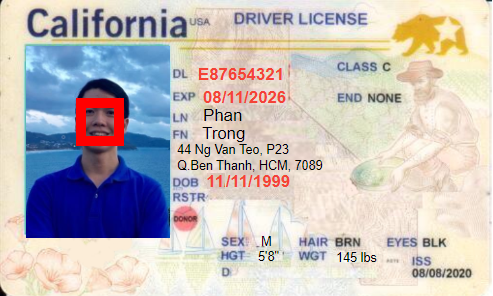

In [117]:
drawFaceRectangles(dl_source_url, dl_faces)

Verify the face id with the digital id

In [118]:
ids

{'video-analyzer-face1.jpg': '610c47ff-3f50-4d3e-90f8-21e48f56159a',
 'video-analyzer-face2.jpg': '3dc89bb9-effc-4664-8db2-fc28a68b003e',
 'video-analyzer-face3.jpg': 'ca8a6da3-5e69-4797-b0c9-9fa424f6cb44',
 'video-analyzer-face4.jpg': 'f334ec63-1eed-4678-96cf-3c4908d2c9bb',
 'video-analyzer-face5.jpg': '66ad63a0-77b9-402d-ba83-429f542d6741',
 'video-analyzer-face6.jpg': 'ba6074ca-261a-487c-8ea5-fb39f335eff5',
 'ca-dl-sample.png': '8a27816b-bb28-4cd5-9e6c-ad299dc439a7'}

In [121]:
get_the_face_id_from_the_driving_license = '8a27816b-bb28-4cd5-9e6c-ad299dc439a7'

In [122]:
person_gp_results = face_client.face.identify([get_the_face_id_from_the_driving_license], PERSON_GROUP_ID)

In [123]:
for result in person_gp_results:
    if result.candidates:
        for candidate in result.candidates:
            print("The Identity match confidence is {}".format(candidate.confidence))
    else:
        print("Can't verify the identity with the person group")

The Identity match confidence is 0.8085
